**Experimental!** [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mthoren-adi/ROUS/blob/master/educational/deconstructed_fft/deconstructed_fft.ipynb)

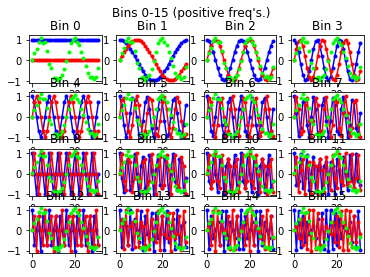

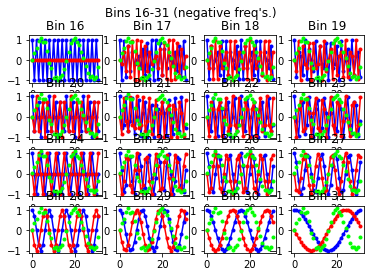

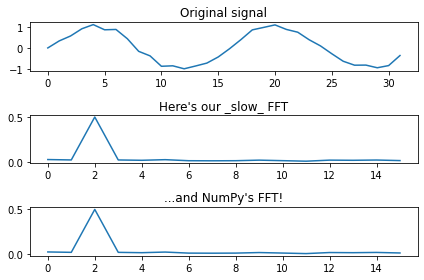

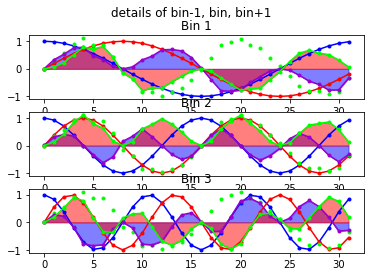

In [1]:

"""
Demonstration of how a FFT works.

Some favorite resources on the web:
http://www.earlevel.com/main/2002/08/31/a-gentle-introduction-to-the-fft/
http://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/
And a YouTube playlist of FFT related videos:
https://www.youtube.com/playlist?list=PLH9hjYI7N9NDDGa5K8nBj28zUdYfZbrBc
"""

# Imort modules
import numpy as np
from matplotlib import pyplot as plt

#first, let's make a sinewave with some noise:
bin_number = 2.0
amplitude = 1.0
noise = 0.1

num_bins = 32 #This is also the number of points in the time record
data = np.zeros(num_bins)

#Generate some input data
for i in range(num_bins):
    data[i]= amplitude * np.sin(2*np.pi*bin_number*i/num_bins)
    data[i] += np.random.normal(0.0, noise)

# And lets take its FFT using NumPy's FFT function, and tuck it away for later
numpy_fft_magnitude = np.abs(np.fft.fft(data)/len(data))

# Okay, now let's deconstruct the FFT a bit. And by "a bit", we mean "a LOT!"
# We've already got the data that we
# want to analyze, so the next step is to make two, 2-d arrays of "test sinusoids"
# where one consists of cosines to detect the real part of a frequency component,
# and the other consists of sines to detect the imaginary part:

test_cosines = np.ndarray((num_bins, num_bins), dtype=float)
test_sines = np.ndarray((num_bins, num_bins), dtype=float)
for freq in range (num_bins):
    for time in range(num_bins):
        test_cosines[freq, time]= np.cos(2*np.pi*freq*time/num_bins)
        test_sines[freq, time]= np.sin(2*np.pi*freq*time/num_bins)

# The next step is to multiply the "test sinusoids" by the original data, one
# frequency at a time to see if "anybody's home". You actually only need to
# "multiply and accumulate", such that one test sinusoid will produce a single
# number. But we want to plot the results, so we're going to construct arrays
# (the "multiply" part) and then sum the elements (the "accumulate" part.)

result_cosines = np.ndarray((num_bins, num_bins), dtype=float)
result_sines = np.ndarray((num_bins, num_bins), dtype=float)

for freq in range (num_bins):
    result_cosines[freq] = test_cosines[freq] * data
    result_sines[freq] = test_sines[freq] * data
    
# This is the final step! Sum the elements of the result arrays, which gives
# you the real and imaginary parts of the DFT:

real_part = np.ndarray((num_bins), dtype=float)
imag_part = np.ndarray((num_bins), dtype=float)

for freq in range (num_bins):
    real_part[freq] = sum(result_cosines[freq])
    imag_part[freq] = sum(result_sines[freq])
# Calculate magnitude of each frequency component (considering real and imaginary parts)
magnitude = np.sqrt(real_part ** 2.0 + imag_part ** 2.0)

# Now plot the deconstructed FFT, showing the test sines and cosines for each bin, with
# the orignal data.

for f in range (0, num_bins):
    if(f<=15):
        plt.figure(1)
    else:
        plt.figure(2)
    plt.subplot(4, 4, ((f) % 16)+1) # % to take care of bins > 15
    plt.title("Bin " + str(f) , fontsize=12)
    lines = plt.plot(test_cosines[f], color='#0000FF', marker=".") #Blue
    lines = plt.plot(test_sines[f], color='#FF0000', marker=".") #Red
    lines = plt.plot(data,  linestyle='', color='#00FF00', marker = ".") #Green
    # Enabling the following two lines shows the product of the test sinusoids
    # And original data, but makes for a cluttered plot!!
    #lines = plt.plot(result_cosines[f], color='#9900CC', marker=".") #purple
    #lines = plt.plot(result_sines[f], color='#00FF00', marker=".") #Green
plt.figure(1)
plt.suptitle("Bins 0-15 (positive freq's.)", fontsize=12)
plt.figure(2)
plt.suptitle("Bins 16-31 (negative freq's.)", fontsize=12)
plt.show()

# And finally, let's see how we did! Plot original data, along with NumPy's idea
# of its FFT, as well as our own FFT

bins_to_plot = num_bins//2 # Set to num_bins to plot the whole 2-sided spectrum

plt.figure(3)
plt.subplot(311)
plt.title("Original signal", fontsize=12)
plt.plot(data)
plt.subplot(312)
plt.title("Here's our _slow_ FFT", fontsize=12)
plt.plot(magnitude[:bins_to_plot]/num_bins)
plt.subplot(313)
plt.title("...and NumPy's FFT!", fontsize=12)
plt.plot(numpy_fft_magnitude[:bins_to_plot])
plt.tight_layout()
plt.show()

# Let's zoom in on the idea that the FFT will detect a frequency that lies
# exactly in one bin, but the adjacent bins will detect nothing (except the
# noise that happens to lie in these bins). Note that this assumes that you have
# entered in an integer bin number!! If not, your frequency will "leak" into these
# adjacent bins. Go on, give it a try!

# Round to nearest integer, in case a non-integer was entered
bin2examine = int(np.rint(bin_number))

plt.figure(4)
plt.suptitle("details of bin-1, bin, bin+1", fontsize=12)
x = np.arange(0.0, 32, 1)
subp = 1
for f in range (bin2examine-1, bin2examine+2):
    plt.subplot(3, 1, subp)
    subp += 1
    plt.title("Bin " + str(f), fontsize=12)
    lines = plt.plot(x, test_cosines[f], color='#0000FF', marker=".") #Blue
    lines = plt.plot(x, test_sines[f], color='#FF0000', marker=".") #Red
    lines = plt.plot(x, data,  linestyle='', color='#00FF00', marker = ".") #Green
    # Enabling the following four lines shows the product of the test sinusoids
    # And original data, and fills in around y=0 to help visualize positive and
    #negative regions, but makes for a bit of a cluttered plot!!
    #Try enabling the first two or second two lines (for real, imag, respectively.)
    lines = plt.plot(x, result_cosines[f], color='#9900CC', marker=".") #purple
    plt.fill_between(x, 0, result_cosines[f], color='#0000FF', alpha=0.5)
    lines = plt.plot(x, result_sines[f], color='#00FF00', marker=".") #Green
    plt.fill_between(x, 0, result_sines[f], color='#FF0000', alpha=0.5)

plt.show()